In [84]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


In [2]:
os.getcwd()

'C:\\Users\\eddye\\Documents\\ML-ZOOMCAMP\\CODE\\WEEK 4'

In [3]:
df = pd.read_csv("../WEEK 3/customer churn.csv")

In [4]:
df.columns = df.columns.str.lower().str.replace(" ","_")

categorical_columns = list(df.dtypes[df.dtypes == "object"].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ","_")
    
    
df.totalcharges = pd.to_numeric(df.totalcharges, errors="coerce")
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == "yes").astype(int)

In [5]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state= 1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state= 1)

df_train= df_train.reset_index(drop =True)
df_val= df_val.reset_index(drop =True)
df_test= df_test.reset_index(drop =True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train ["churn"]
del df_val ["churn"]
del df_test["churn"]


In [6]:
numerical = ["tenure", "monthlycharges", "totalcharges" ]

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [7]:
dv = DictVectorizer(sparse = False)

train_dicts = df_train[categorical + numerical].to_dict(orient = "records")
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
val_dict = df_val[categorical + numerical].to_dict(orient = "records")
X_val = dv.transform(val_dict)


## probability [0,1] is why it is dimesnsional
y_pred = model.predict_proba(X_val)[:,1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()


0.8034066713981547

# 4.2 Accuracy and dummy model

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
### creating a loop of churn decisions to ascertain best decision

thresholds = np.linspace(0,1,21)
scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print("%.2f %.3f" % (t,score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.765
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [12]:
score

0.7260468417317246

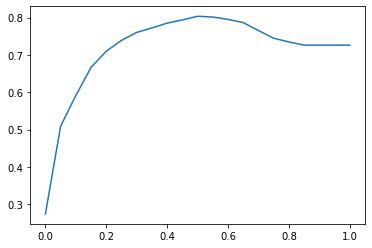

In [13]:
plt.plot(thresholds, scores)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
### creating a loop of churn decisions to ascertain best decision

thresholds = np.linspace(0,1,21)
scores = []

for t in thresholds:
    score = accuracy_score (y_val, y_pred >= t)
    print("%.2f %.3f" % (t,score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.765
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


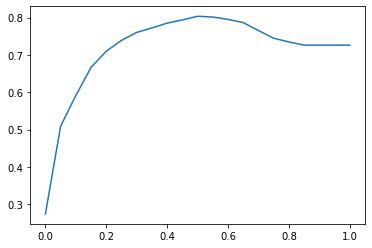

In [16]:
plt.plot(thresholds, scores)

In [17]:
 from collections import Counter

In [18]:
Counter (y_pred >= 1)

Counter({False: 1409})

In [19]:
y_val.mean()

###  27% are not churning
### 73% are churning
### because no value is more than 1, the dummy model predicts that
## every customer will not churn



0.2739531582682754

In [20]:
y_val.mean()

0.2739531582682754

<b> OUR MODEL = 80% </b>

<b> DUMMY M0DEL = 73% </b>

In [21]:
Counter(y_val)

Counter({0: 1023, 1: 386})

In [22]:
## 27% are churning

y_val.mean()

0.2739531582682754

In [23]:
## 72% are churning

1- y_val.mean()

0.7260468417317246

We have class imbalance because the data for prediction is smaller in number than the other class. If we predict that all the data is non-churning, the model will be quite good.

# 4.3 Confusion table

- Different types of errors and correct decisions
- Arranging them in a table

In [24]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [25]:
t = 0.5

predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [26]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [27]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [28]:
tp,tn

(210, 922)

In [29]:
fp,fn

(101, 176)

In [30]:
confusion_matrix = np.array([
    [ tn, fp ],
    [ fn, tp ]
])

confusion_matrix

array([[922, 101],
       [176, 210]])

In [31]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

Instead of using accuracy alone, we can make confirmed decisions about the predictions our models make

# 4.4 Precison and recall

In [32]:
(tp + tn) / (tp + tn + fn + fp) 

0.8034066713981547

Precision = TP / ALL_POSITIVE (# positive ==> all that were predicted to churn).



In [33]:
precision = tp / (tp + fp)
precision

0.6752411575562701

This means that 33% are approximately mistakes - people who were not meant to get the promotional email

In [34]:
tp, (tp + fp)

(210, 311)

Recall = Fraction of correctly identified positive examples. This means that people that were going to churn and we are looking for the fraction of correctly identified churn.

Recall = TP / #POSITIVE OBVERSATIONS

Positive observations here means all the people that actually churned

In [35]:
recall = tp /(tp + fn)
recall


0.5440414507772021

The recall here is 54% meaning we failed to identify 46% of people who are churning. Recall here means we are looking at the customers that are actually churning

Remember that the accuracy is 80% but the recall and precision showed that the model is not really that good for the purpose we want to use it for.
Accuracy can be misleading especially in cases where we have class imbalance - 

# 4.5 ROC CURVES - Receiver operating characteristics curves

Started during the world war to detect radar planes.

## FPR (False positive rate) AND TPR (True positive rate)

## FALSE POSITIVE RATE (FPR)

FPR - fraction of false positives among all positive examples. What this means is that it is the ratio of false postive (predicted to churn but didnt) / all the people that did not churn.

FPR = FP / (TN + FP)

## TRUE POSITIVE RATE (TPR)

<b> Recall is the same value as Tpr <b>

In [36]:
tpr = tp / (fn + tp)
fpr = fp / (tn + fp)

In [37]:
tpr,fpr

(0.5440414507772021, 0.09872922776148582)

In [38]:
recall

0.5440414507772021

Computing for all of them

In [39]:
scores =[]
thresholds = np.linspace(0,1,101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [40]:
scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 912, 1, 111),
 (0.02, 384, 830, 2, 193),
 (0.03, 383, 766, 3, 257),
 (0.04, 381, 715, 5, 308),
 (0.05, 379, 685, 7, 338),
 (0.06, 377, 661, 9, 362),
 (0.07, 372, 641, 14, 382),
 (0.08, 371, 613, 15, 410),
 (0.09, 369, 580, 17, 443),
 (0.1, 366, 556, 20, 467),
 (0.11, 365, 528, 21, 495),
 (0.12, 365, 509, 21, 514),
 (0.13, 360, 477, 26, 546),
 (0.14, 354, 453, 32, 570),
 (0.15, 351, 435, 35, 588),
 (0.16, 347, 419, 39, 604),
 (0.17, 346, 401, 40, 622),
 (0.18, 344, 384, 42, 639),
 (0.19, 338, 369, 48, 654),
 (0.2, 333, 356, 53, 667),
 (0.21, 330, 341, 56, 682),
 (0.22, 323, 322, 63, 701),
 (0.23, 320, 313, 66, 710),
 (0.24, 316, 303, 70, 720),
 (0.25, 309, 291, 77, 732),
 (0.26, 304, 281, 82, 742),
 (0.27, 303, 270, 83, 753),
 (0.28, 295, 256, 91, 767),
 (0.29, 291, 244, 95, 779),
 (0.3, 284, 236, 102, 787),
 (0.31, 280, 230, 106, 793),
 (0.32, 278, 226, 108, 797),
 (0.33, 276, 221, 110, 802),
 (0.34, 274, 212, 112, 811),
 (0.35000000000000003, 272,

In [41]:
columns = ["threshold", "tp", "fp", "fn", "tn"]
df_scores = pd.DataFrame(scores, columns=columns)


In [42]:
df_scores

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,912,1,111
2,0.02,384,830,2,193
3,0.03,383,766,3,257
4,0.04,381,715,5,308
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [43]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,210,101,176,922
60,0.6,150,53,236,970
70,0.7,75,20,311,1003
80,0.8,13,1,373,1022
90,0.9,0,0,386,1023


In [47]:
df_scores["tpr"] = df_scores.tp /(df_scores.tp + df_scores.fn)
df_scores["fpr"] = df_scores.fp /(df_scores.fp + df_scores.tn)

In [48]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,75,20,311,1003,0.194301,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


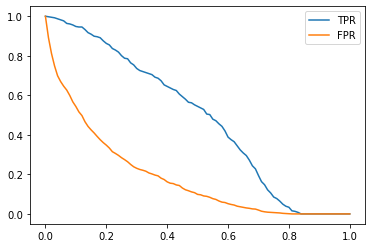

In [52]:
plt.plot(df_scores.threshold, df_scores.tpr, label= "TPR")
plt.plot(df_scores.threshold, df_scores.fpr, label= "FPR")
plt.legend()

## Random_model

In [53]:
np.random.seed(1)
y_rand = np.random.uniform(0,1, size = len(y_val))

In [54]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [56]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores =[]
    thresholds = np.linspace(0,1,101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))
    
    columns = ["threshold", "tp", "fp", "fn", "tn"]
    df_scores = pd.DataFrame(scores, columns=columns)
    
    df_scores["tpr"] = df_scores.tp /(df_scores.tp + df_scores.fn)
    df_scores["fpr"] = df_scores.fp /(df_scores.fp + df_scores.tn)
    
    return df_scores

In [57]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [58]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


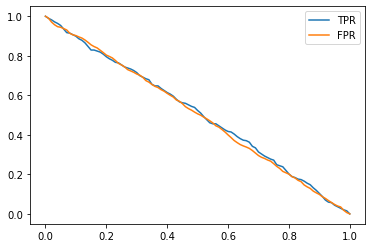

In [60]:
plt.plot(df_rand.threshold, df_rand.tpr, label= "TPR")
plt.plot(df_rand.threshold, df_rand.fpr, label= "FPR")
plt.legend()

## Ideal model

In [68]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

num_neg, num_pos

(1023, 386)

In [69]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [70]:
y_ideal_pred = np.linspace(0,1, len(y_val))

In [71]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [72]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

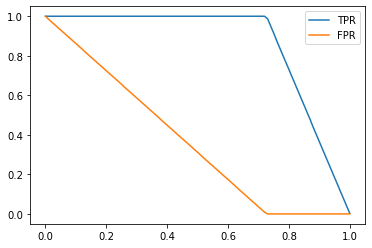

In [73]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label= "TPR")
plt.plot(df_ideal.threshold, df_ideal.fpr, label= "FPR")
plt.legend()

## Putting everythin together

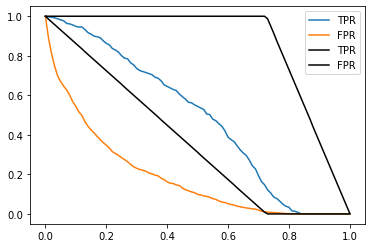

In [76]:
plt.plot(df_scores.threshold, df_scores.tpr, label= "TPR")
plt.plot(df_scores.threshold, df_scores.fpr, label= "FPR")

#plt.plot(df_rand.threshold, df_rand.tpr, label= "TPR")
# plt.plot(df_rand.threshold, df_rand.fpr, label= "FPR")

plt.plot(df_ideal.threshold, df_ideal.tpr, label= "TPR", color ="black")
plt.plot(df_ideal.threshold, df_ideal.fpr, label= "FPR", color = "black")

plt.legend()

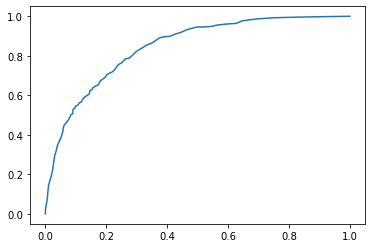

In [78]:
plt.plot(df_scores.fpr, df_scores.tpr)

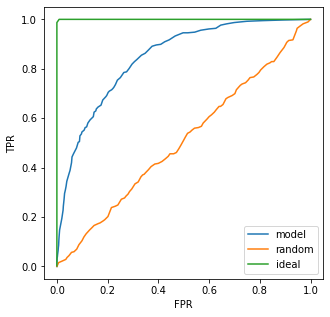

In [82]:
plt.figure(figsize = (5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label ="model")
plt.plot(df_rand.fpr, df_rand.tpr, label ="random")
plt.plot(df_ideal.fpr, df_ideal.tpr, label = "ideal")

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.legend()

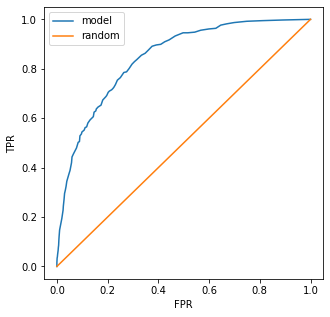

In [83]:
plt.figure(figsize = (5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label ="model")
plt.plot([0,1] , [0,1] , label ="random")

#plt.plot(df_rand.fpr, df_rand.tpr, label ="random")
# plt.plot(df_ideal.fpr, df_ideal.tpr, label = "ideal")

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.legend()

We want the baseline model to be close as possible to the ideal spot (which is 1.0) and also be far from the the baseline model (in this case is the random line.)

read more on ROC curves.

In [85]:
## sklearn helps us compute this

from sklearn.metrics import roc_curve

In [86]:
fpr, tpr, thresholds = roc_curve (y_val, y_pred)

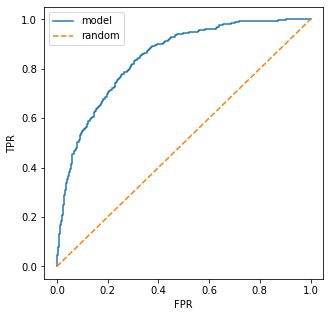

In [88]:
plt.figure(figsize = (5,5))

plt.plot(fpr, tpr, label ="model")
plt.plot([0,1] , [0,1] , label ="random", linestyle = "--")


plt.xlabel("FPR")
plt.ylabel("TPR")

plt.legend()

# ROC AUC CURVES

For roc cuves, we want to be close to the ideal point (TPR=1, FPR=0) as possible.
One way of measuring that is getting the area under the curve.

In [89]:
from sklearn.metrics import auc

In [90]:
auc(fpr, tpr)

0.843850505725819

In [91]:
auc(df_scores.fpr, df_scores.tpr)

0.8438213828068416

In [92]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [93]:
from sklearn.metrics import roc_auc_score

In [94]:
roc_auc_score(y_val, y_pred)

0.843850505725819

In [95]:
auc(fpr, tpr)

0.843850505725819

AUC tells us what is the probability a randomly selected positive example (people that churned) has a score that is higher than a randomly selected negative example. Testing in code below:

In [96]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [97]:
import random

In [ ]:
pos_ind = random.randint(0, len(pos) - 1)
neg_ind = random.randint(0, len(neg) - 1)

In [99]:
n = 100000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)
    
    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.84295

In [104]:
n=50000

pos_ind = np.random.randint(0, len(pos), size = n)
neg_ind = np.random.randint(0, len(neg), size = n)

In [105]:
pos[pos_ind] > neg[neg_ind]

array([ True,  True, False, ...,  True,  True,  True])

In [106]:
(pos[pos_ind] > neg[neg_ind]).mean()

0.844

# 4.7 K-FOLD Cross-Validation

In [125]:
def train(df_train, y_train):
    
    dicts = df_train[categorical + numerical].to_dict(orient="records")
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    return dv, model

In [126]:
dv, model = train(df_train, y_train)

In [127]:
def predict(df, dv, model):
    dicts = df [categorical + numerical].to_dict(orient = "records")
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

In [128]:
y_pred = predict (df_val, dv, model)

In [129]:
from sklearn.model_selection import KFold

In [130]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [131]:
train_idx, val_idx = next (kfold.split(df_full_train))

In [132]:
len(train_idx), len(val_idx)

(5070, 564)

In [133]:
len(df_full_train)

5634

In [134]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [135]:
from tqdm.auto import tqdm

In [136]:
scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.churn.values
    y_val = df_val.churn.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

0it [00:00, ?it/s]

C:\Users\eddye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\eddye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [137]:
scores

[0.8479398247539081,
 0.8410581683168317,
 0.8557214756739697,
 0.8343263928894741,
 0.8265973945409429,
 0.8342657342657342,
 0.8412569195701727,
 0.8186669829222013,
 0.8455461686675559,
 0.8614332291351551]

In [138]:
np.mean(scores), np.std(scores)

(0.8406812290735945, 0.012240125901775431)

In [142]:
print("%.3f +- %.3f"% (np.mean(scores), np.std(scores)))

0.841 +- 0.012


In [143]:
def train(df_train, y_train, C=1.0):
    
    dicts = df_train[categorical + numerical].to_dict(orient="records")
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

dv, model = train(df_train, y_train, C=0.001)


def predict(df, dv, model):
    dicts = df [categorical + numerical].to_dict(orient = "records")
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

y_pred = predict (df_val, dv, model)


In [146]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    scores = []
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print("C=%s %.3f +- %.3f"% (C, np.mean(scores), np.std(scores)))



  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.009
C=0.1 0.840 +- 0.008
C=0.5 0.841 +- 0.006
C=1 0.841 +- 0.009
C=5 0.841 +- 0.008
C=10 0.841 +- 0.008


In [148]:
dv, model = train(df_full_train, df_full_train.churn.values, C=C)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8590288385496225

In [149]:
scores

[0.8419315336248243,
 0.8457261455436365,
 0.8325466586393739,
 0.8320150124704228,
 0.8525462018763139]